In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib as mpl

In [7]:
df=pd.read_csv("file:///C:/Users/P4/Desktop/datacat.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 22 columns):
ad_id         625 non-null int64
xyzCampId     625 non-null int64
fbCampId      625 non-null int64
interest      625 non-null int64
impr          625 non-null int64
Clicks        625 non-null int64
Spent         625 non-null float64
conv          625 non-null int64
appConv       625 non-null int64
totConv       625 non-null int64
appConVal     625 non-null int64
conVal        625 non-null int64
totConVal     625 non-null int64
CPM           625 non-null float64
costPerCon    625 non-null float64
ROAS          625 non-null float64
gender_F      625 non-null int64
gender_M      625 non-null int64
age_30-34     625 non-null int64
age_35-39     625 non-null int64
age_40-44     625 non-null int64
age_45-49     625 non-null int64
dtypes: float64(4), int64(18)
memory usage: 107.5 KB


In [9]:
df.columns

Index(['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [11]:
encoded=df[['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49']].apply(LabelEncoder().fit_transform)

In [12]:
bigdata =pd.concat([encoded], axis=1)

In [16]:
X=bigdata.loc[:,bigdata.columns!='ROAS']

In [17]:
Y=bigdata.loc[:,bigdata.columns=='ROAS']

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [25]:
lr_clf=LinearRegression()

In [26]:
lr_clf.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr_clf.score (X_train,Y_train)

0.8441028352719024

In [28]:
from sklearn.model_selection import learning_curve

In [29]:
features=['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49']

In [30]:
target='ROAS'

In [31]:
train_sizes = [0.1,0.33,0.56,0.82,1]
x = bigdata[features]
y=bigdata[target]

In [32]:
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), x, y, train_sizes=train_sizes, cv=5)

In [33]:
train_sizes

array([ 50, 165, 280, 410, 500])

In [34]:
train_scores

array([[0.86530878, 0.82237432, 0.82237432, 0.82237432, 0.82237432],
       [0.81728493, 0.80568896, 0.78934979, 0.78934979, 0.78934979],
       [0.81505234, 0.80068387, 0.80763649, 0.80317341, 0.80317341],
       [0.83045807, 0.82395687, 0.82873392, 0.81554296, 0.804306  ],
       [0.8307094 , 0.82552871, 0.82852176, 0.81768389, 0.81505969]])

In [35]:
valid_scores

array([[ -1.94149648,  -5.87944973, -13.89965964, -29.95112985,
        -11.19285948],
       [  0.66705156,   0.7728501 ,   0.25228055,  -0.6626244 ,
         -2.13749517],
       [  0.69303248,   0.80150244,   0.77126415,   0.34012566,
          0.17962301],
       [  0.6608363 ,   0.80852826,   0.79383125,   0.80741616,
          0.67253325],
       [  0.6628716 ,   0.80351505,   0.79535417,   0.80601975,
          0.69097576]])

In [36]:
brier_score_loss?

Object `brier_score_loss` not found.


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
l_clf=LogisticRegression()

In [41]:
l_clf.fit(X_train,Y_train)

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
model=l_clf
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
proba_train=pd.DataFrame(model.predict_proba(X_train),columns=model.classes_)
proba_test=pd.DataFrame(model.predict_proba(X_test),columns=model.classes_)

In [44]:
len(X_train),len(Y_train),len(X_test),len(Y_test),len(pred_train),len(pred_test)

(418, 418, 207, 207, 418, 207)

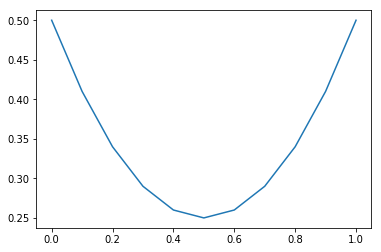

In [45]:
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from numpy import array
testy = [0 for x in range(50)] + [1 for x in range(50)]
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [brier_score_loss(testy, [y for x in range(len(testy))]) for y in predictions]
pyplot.plot(predictions, losses)
pyplot.show()

In [47]:
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses_test = [brier_score_loss(Y_test, [Y for X in range(len(Y_test))])
                         for Y in predictions]

In [48]:
losses_test

[0.014492753623188406,
 0.021594202898550723,
 0.04869565217391307,
 0.09579710144927535,
 0.16289855072463774,
 0.25,
 0.35710144927536225,
 0.48420289855072474,
 0.6313043478260872,
 0.7984057971014498,
 0.9855072463768116]

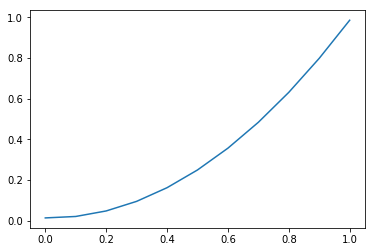

In [49]:
pyplot.plot(predictions, losses_test)
pyplot.show()

In [ ]:
 data=random.sample(list(data),k)

In [ ]:
def init_centroids(labelled_data,k):
    """
    randomly pick some k centers from the data as starting values
    for centroids. Remove labels.
    """
    return map(lambda data: data[1], random.sample(labelled_data,k))

def sum_cluster(labelled_cluster):
    """
    from https://stackoverflow.com/a/20642156
    element-wise sums a list of arrays.
    """
    # assumes len(cluster) > 0
    sum_ = labelled_cluster[0][1].copy()
    for (label,vector) in labelled_cluster[1:]:
        sum_ += vector
    return sum_

def mean_cluster(labelled_cluster):
    """
    compute the mean (i.e. centroid at the middle)
    of a list of vectors (a cluster):
    take the sum and then divide by the size of the cluster.
    """
    sum_of_points = sum_cluster(labelled_cluster)
    mean_of_points = sum_of_points * (1.0 / len(labelled_cluster))
    return mean_of_points

In [ ]:
def form_clusters(labelled_data, unlabelled_centroids):
    """
    given some data and centroids for the data, allocate each
    datapoint to its closest centroid. This forms clusters.
    """
    # enumerate because centroids are arrays which are unhashable
    centroids_indices = range(len(unlabelled_centroids))

    # initialize an empty list for each centroid. The list will
    # contain all the datapoints that are closer to that centroid
    # than to any other. That list is the cluster of that centroid.
    clusters = {c: [] for c in centroids_indices}

    for (label,Xi) in labelled_data:
        # for each datapoint, pick the closest centroid.
        smallest_distance = float("inf")
        for cj_index in centroids_indices:
            cj = unlabelled_centroids[cj_index]
            distance = np.linalg.norm(Xi - cj)
            if distance < smallest_distance:
                closest_centroid_index = cj_index
                smallest_distance = distance
        # allocate that datapoint to the cluster of that centroid.
        clusters[closest_centroid_index].append((label,Xi))
    return clusters.values()

def move_centroids(labelled_clusters):
    """
    returns list of mean centroids corresponding to clusters.
    """
    new_centroids = []
    for cluster in labelled_clusters:
        new_centroids.append(mean_cluster(cluster))
    return new_centroids

In [ ]:
def repeat_until_convergence(labelled_data, labelled_clusters, unlabelled_centroids):
    """
    form clusters around centroids, then keep moving the centroids
    until the moves are no longer significant.
    """
    previous_max_difference = 0
    while True:
        unlabelled_old_centroids = unlabelled_centroids
        unlabelled_centroids = move_centroids(labelled_clusters)
        labelled_clusters = form_clusters(labelled_data, unlabelled_centroids)
        # keep old_clusters and clusters so we can get the maximum difference
        # between centroid positions every time.
        differences = map(lambda a, b: np.linalg.norm(a-b),unlabelled_old_centroids,unlabelled_centroids)
        max_difference = max(differences)
        difference_change = abs((max_difference-previous_max_difference)/np.mean([previous_max_difference,max_difference])) * 100
        previous_max_difference = max_difference
        # difference change is nan once the list of differences is all zeroes.
        if np.isnan(difference_change):
            break
    return labelled_clusters, unlabelled_centroids

In [ ]:
def cluster(labelled_data, k):
    """
    runs k-means clustering on the data.
    """
    centroids = init_centroids(labelled_data, k)
    clusters = form_clusters(labelled_data, centroids)
    final_clusters, final_centroids = repeat_until_convergence(labelled_data, clusters, centroids)
    return final_clusters, final_centroids

In [ ]:
def assign_labels_to_centroids(clusters, centroids):
    """
    Assigns a data label to each centroid. Note: This function
     depends on clusters and centroids being in the same order.
    """
    labelled_centroids = []
    for i in range(len(clusters)):
        labels = map(lambda data: data[0], clusters[i])
        # pick the most common label
        most_common = max(set(labels), key=labels.count)
        centroid = (most_common, centroids[i])
        labelled_centroids.append(centroid)
    return labelled_centroids

In [ ]:
def classify_data(data, labelled_centroids):
    """
    given an unlabelled data represented by a vector and a list of
    labelled centroids [(label,vector)], determine closest centroid
    and thus classify the digit.
    """
    mindistance = float("inf")
    for (label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - digit)
        if distance < mindistance:
            mindistance = distance
            closest_centroid_label = label
    return closest_centroid_label